# 1. Environment Setup

### 1.1 Change Directory

Use jupyter magic command `%cd` to change the directory to the root directory of the project

In [3]:
%cd ../

/Users/joye/Github/datawhale_team_learning/projects/202301_image_classification


### 1.2 Install Packages

Install the packages with `pip`:
- `-r` means instaling from requirements.txt
- `-q` means installing quitely

In [2]:
!pip install -q -r requirements.txt

## 2. Download Images for Inference

In [9]:
!bash src/download.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37074  100 37074    0     0  34617      0 --:--:-- --:--:-- --:--:--     00  0:00:01  0:00:01 --:--:-- 35074
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  419k  100  419k    0     0   730k      0 --:--:-- --:--:-- --:--:--  740k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  453k  100  453k    0     0   821k      0 --:--:-- --:--:-- --:--:--  835k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34701  100 34701    0     0   100k      0 --:--:-- --:--:-- --:--:--  103k
  % Total    % Rec

## 3. Inference using Pretrained Models(en)

### 3.1 Load Packages and Setup Device<a id='31'></a>

In [37]:
import importlib
importlib.reload(inference)

from src import inference
from PIL import Image 
# sets the backend of matplotlib to the 'inline' backend, 
# With this backend, the output of plotting commands is displayed 
# inline within frontends like the Jupyter notebook, directly below
# the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.
%matplotlib inline

### 3.2 Load Pretrained Models<a id='32'></a>

In [39]:
from torchvision.models import ResNet18_Weights, resnet18
model = resnet18(weights=ResNet18_Weights.DEFAULT)

ImageInference = inference.InferImage(model=model)
ImageInference.verbose = False

GPU is unavailable thus using CPU


### 3.3 Image Preprocessing for Inference

Before preprocess:  (820, 1094, 3)
After preprocess:  torch.Size([3, 224, 224])


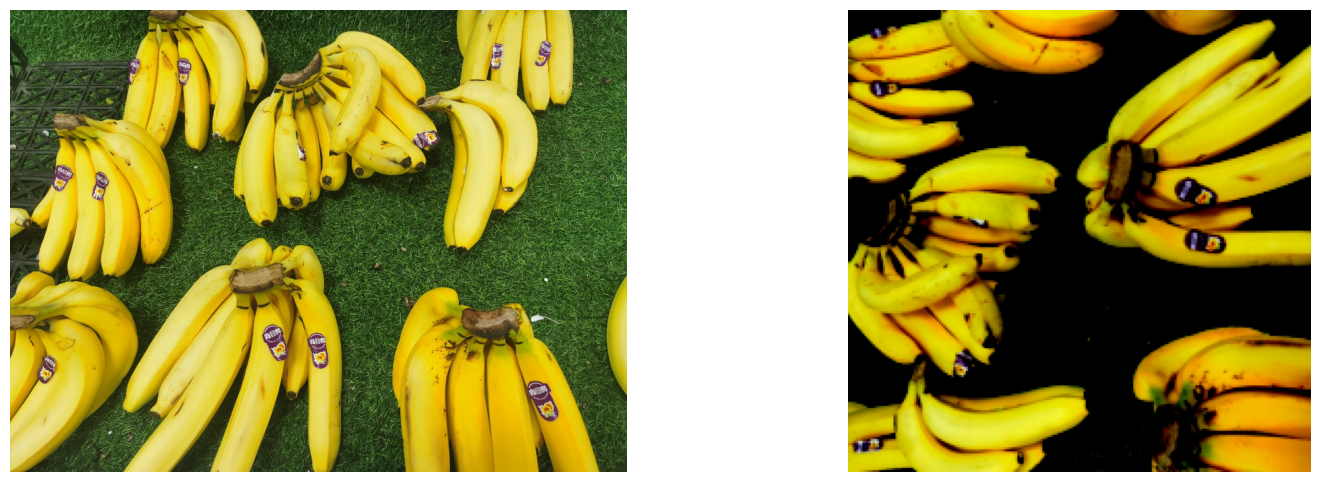

In [26]:
################################################
# parameter
################################################
img_path = 'data/image_net/test/banana1.jpg'
################################################
img_pil = Image.open(img_path)
input_img = ImageInference.preprocess(img_pil)

### 3.4 Inference 

In [27]:
pred_softmax = ImageInference.inference(input_img)

Run model inference and output logits. The shape is -> torch.Size([1, 1000])
Apply softmax on the logits to get probability. The shape is -> torch.Size([1, 1000])


### 3.5 Analysis on Infernce Results

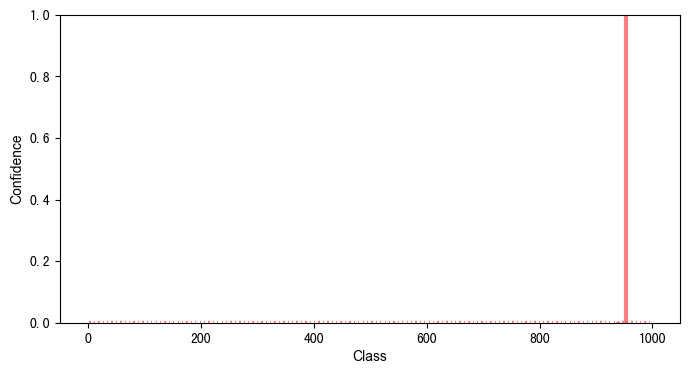

In [28]:
ImageInference.plot_class_probability(pred_softmax)

### 3.6 Annotate Image with prediction

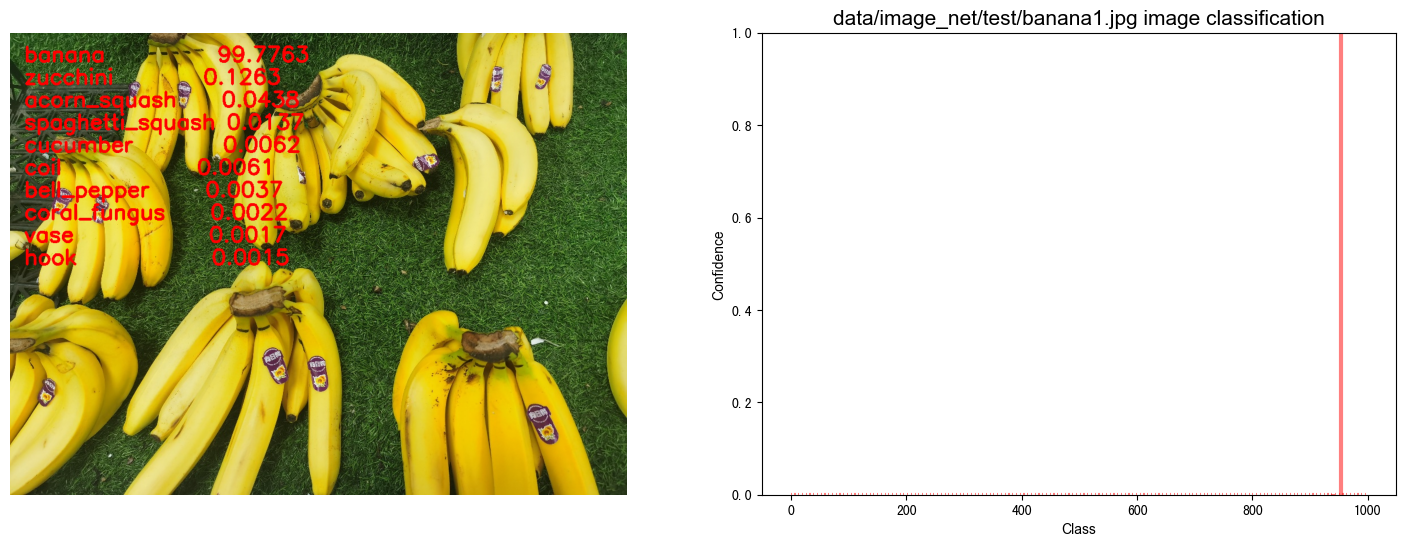

<Figure size 640x480 with 0 Axes>

In [29]:
annotated_img = ImageInference.annotate_image(img=None, 
                                              img_path=img_path, 
                                              pred_softmax=pred_softmax, 
                                              n=10)
ImageInference.pair_plot(img_path,annotated_img,pred_softmax)

### 3.7 Table of Probablities of Classes

In [30]:
display(ImageInference.prediction(pred_softmax)) # display the final prediction

,Class,Class_ID,Confidence(%),WordNet
0,banana,954,99.776316,n07753592
0,zucchini,939,0.126272,n07716358
0,acorn_squash,941,0.043848,n07717410
0,spaghetti_squash,940,0.013670,n07716906
0,cucumber,943,0.006226,n07718472
0,coil,506,0.006063,n03065424
0,bell_pepper,945,0.003749,n07720875
0,coral_fungus,991,0.002227,n12985857
0,vase,883,0.001681,n04522168
0,hook,600,0.001548,n03532672


## 4. Inference using Pretrained Models(zh)

### 4.1 Import Chinese Font for Pillow

Font setup in `/src/inference.py`

### 4.2 Load Packages and Setup Device

Packages has been loaded in  [section 3.1](#31)

### 4.3 Load Pretrained Models
Reuse the Previous model and initiated class  in [section 3.2](#32)

### 4.5 Image Preprocessing for Inference

Before preprocess:  (1560, 2340, 3)
After preprocess:  torch.Size([3, 224, 224])


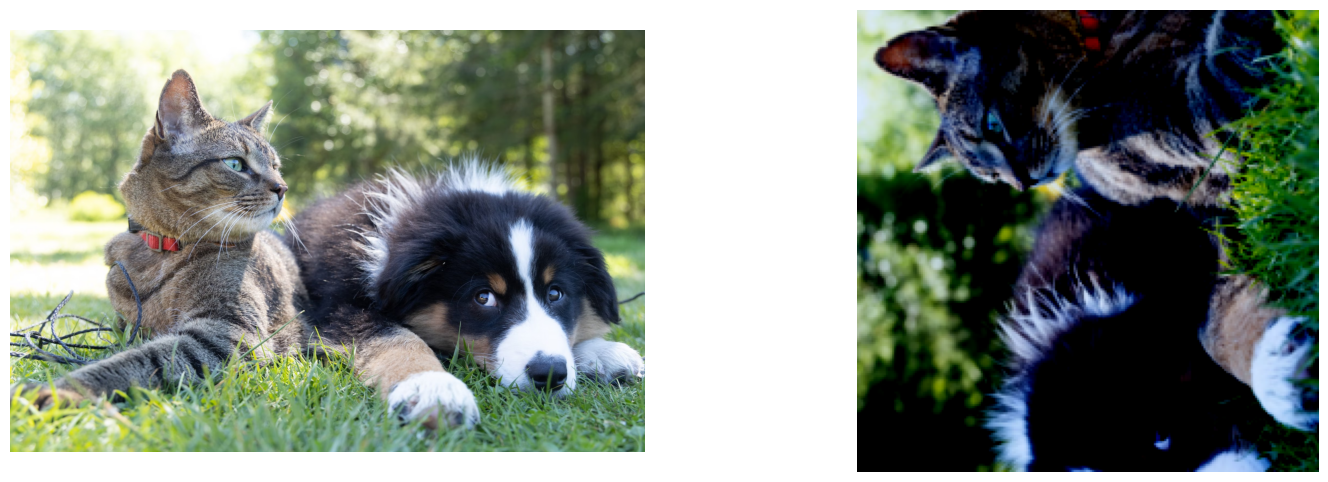

In [40]:
################################################
# parameter
################################################
img_path = 'data/image_net/test/cat_dog.jpg'
################################################
img_pil = Image.open(img_path)
input_img = ImageInference.preprocess(img_pil)

### 4.5 Inference 

In [41]:
pred_softmax = ImageInference.inference(input_img)

Run model inference and output logits. The shape is -> torch.Size([1, 1000])
Apply softmax on the logits to get probability. The shape is -> torch.Size([1, 1000])


### 4.6 Analysis on Infernce Results

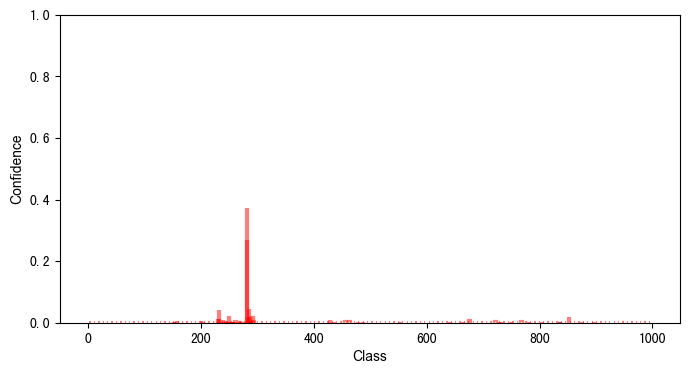

In [42]:
# Returns a copy of this object in CPU memory
ImageInference.plot_class_probability(pred_softmax)

### 4.7 Annotate Image with Prediction

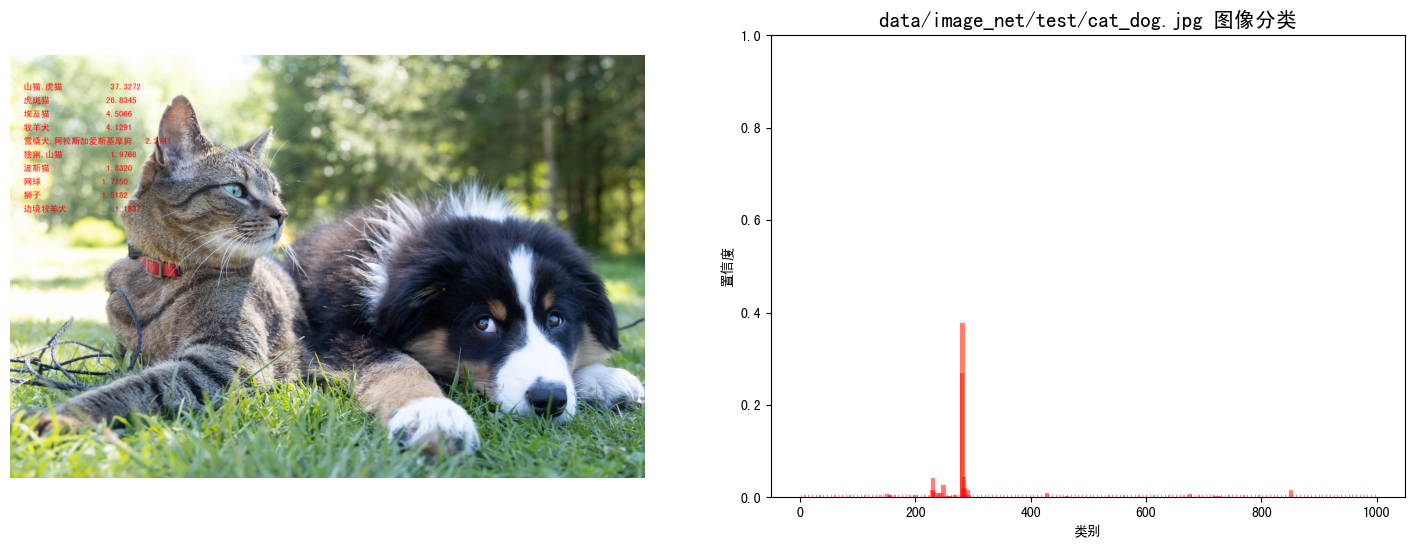

<Figure size 640x480 with 0 Axes>

In [43]:
ImageInference.language='zh'
annotated_img = ImageInference.annotate_image(img=None, 
                                              img_path=img_path, 
                                              pred_softmax=pred_softmax, 
                                              n=10)
ImageInference.pair_plot(img_path,annotated_img,pred_softmax)

### 4.8 Table of Probablities of Classes

In [44]:
display(ImageInference.prediction(pred_softmax)) 

,Class,Class_ID,Confidence(%),WordNet
0,"山猫,虎猫",282,37.327239,n02123159
0,虎斑猫,281,26.834521,n02123045
0,埃及猫,285,4.506620,n02124075
0,牧羊犬,231,4.129088,n02106030
0,"雪橇犬,阿拉斯加爱斯基摩狗",249,2.274127,n02110063
0,"猞猁,山猫",287,1.976750,n02127052
0,波斯猫,283,1.831976,n02123394
0,网球,852,1.714958,n04409515
0,狮子,291,1.518197,n02129165
0,边境牧羊犬,232,1.183690,n02106166


## 5. Video Inference(en)

In [1]:
%cd ../

/Users/joye/Github/datawhale_team_learning/projects/202301_image_classification


In [2]:
import matplotlib
matplotlib.use('Agg')

In [4]:
from src import inference
from src.inference import *

In [5]:
################################################
# parameter
################################################
input_video = 'data/image_net/test/video_3.mp4'
################################################

In [6]:
from torchvision.models import ResNet18_Weights, resnet18
model = resnet18(weights=ResNet18_Weights.DEFAULT)

VideoInference = inference.InferVideo(model)

GPU is unavailable thus using CPU


In [159]:
VideoInference.predict_and_annotate(input_path=input_video,output_path='output/output_pred.mp4')

创建文件夹 20230119193442 用于存放每帧预测结果
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 613/613, 18.6 task/s, elapsed: 33s, ETA:     0s[                                                  ] 0/613, elapsed: 0s, ETA:
删除临时文件夹 20230119193442


In [176]:
VideoInference.predict_and_annotate(input_path=input_video,output_path='output/output_pred_bar.mp4',with_bar=True)

创建文件夹 20230119195047 用于存放每帧预测结果
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 613/613, 28.6 task/s, elapsed: 21s, ETA:     0s[                                                  ] 0/613, elapsed: 0s, ETA:
删除临时文件夹 20230119195047


## 6. Video Inference(zh)

In [7]:
VideoInference.language='zh'

In [20]:
VideoInference.predict_and_annotate(input_path=input_video,output_path='output/output_pred_zh.mp4')

创建文件夹 20230119215239 用于存放每帧预测结果
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 613/613, 33.0 task/s, elapsed: 19s, ETA:     0s[                                                  ] 0/613, elapsed: 0s, ETA:
删除临时文件夹 20230119215239


In [8]:
VideoInference.predict_and_annotate(input_path=input_video,output_path='output/output_pred_zh_bar.mp4',with_bar=True)

创建文件夹 20230119230908 用于存放每帧预测结果
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 613/613, 49.4 task/s, elapsed: 12s, ETA:     0s[                                                  ] 0/613, elapsed: 0s, ETA:
删除临时文件夹 20230119230908


## 6. Stream Inference(en)

In [2]:
import matplotlib
matplotlib.use('Agg')

In [7]:
# import importlib
# importlib.reload(inference)
from src import inference

In [5]:
from torchvision.models import ResNet18_Weights, resnet18
model = resnet18(weights=ResNet18_Weights.DEFAULT)

StreamInference = inference.InferStream(model)

GPU is unavailable thus using CPU


In [11]:
StreamInference.predict_and_annotate()

## 7. Stream Inference(zh)

In [8]:
StreamInference.language='zh'

In [9]:
StreamInference.predict_and_annotate()